<a href="https://colab.research.google.com/github/eliezerkapish/Machine-Learning-Projects/blob/main/Predict_NVIDIA_Share_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy yfinance matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [ ]:
data = yf.download('NVDA')

/tmp/ipython-input-2067517136.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971410,5.971410,5.892011,5.942538,237536000
2020-01-03,5.875832,5.919639,5.826798,5.851688,205384000
2020-01-06,5.900474,5.905701,5.756360,5.782494,262636000
2020-01-07,5.971907,6.017705,5.883796,5.928847,314856000
2020-01-08,5.983109,6.024427,5.927604,5.967677,277108000


In [ ]:
data = yf.download('NVDA', start='2020-01-01', end='2023-01-01')

/tmp/ipython-input-4281100680.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Returns'] = data['Close'].pct_change()

In [ ]:
num_simulations = 10000
num_days = 22

last_price = data['Close'].iloc[-1]

simulation_df = np.zeros((num_simulations, num_days))

mu = data['Returns'].mean()
sigma = data['Returns'].std()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


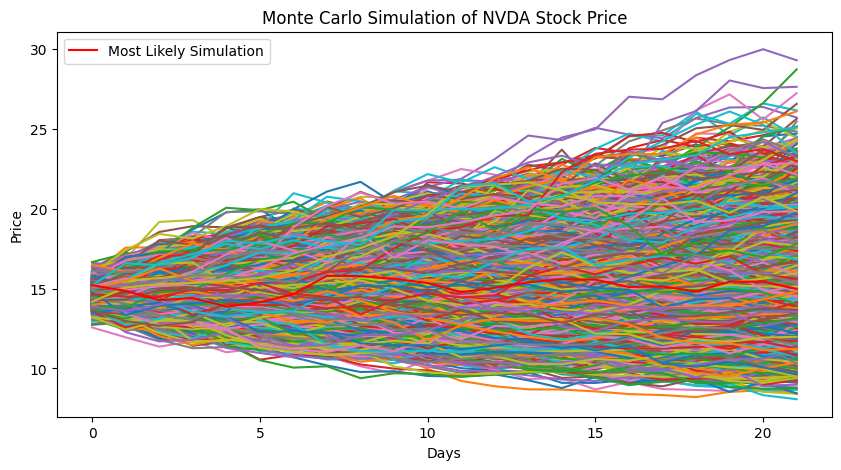

In [ ]:
for simulation in range(num_simulations):
  price_list = [last_price.iloc[0]] # Extract the scalar value from the Series

  for d in range(num_days):
    price = price_list[-1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.normal())
    price_list.append(price)
    simulation_df[simulation, d] = price # Assign the simulated price for the current day to the correct element in the simulation_df

final_prices = simulation_df[:, -1] # Get the last day's price for all simulations

median_final_price = np.median(final_prices)

most_likely_simulation_index = np.argmin(np.abs(final_prices - median_final_price))

most_likely_simulation = simulation_df[most_likely_simulation_index, :] # Get the most likely simulation run

plt.figure(figsize=(10,5))
plt.plot(simulation_df.T) # Transpose for plotting each simulation as a separate line
plt.plot(most_likely_simulation, color='red', label='Most Likely Simulation')
plt.title('Monte Carlo Simulation of NVDA Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print(f"The most likely simulation's final price is: {most_likely_simulation[-1]}")

The most likely simulation's final price is: 14.982105802225401


In [ ]:
data.tail()

Price,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2022-12-23,15.191640,15.324514,14.868945,15.181649,349326000,-0.008671
2022-12-27,14.107661,15.085737,14.042722,15.059761,464902000,-0.071354
2022-12-28,14.022745,14.248532,13.870888,13.913848,351066000,-0.006019
2022-12-29,14.589210,14.669134,14.213565,14.388400,354923000,0.040396
2022-12-30,14.600199,14.615184,14.219558,14.320462,310490000,0.000753
